In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from collections import deque
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/7th semester/DRL project/dynamic_pricing.csv")

In [ ]:
def create_data_dictionary(df):
    data_dict = pd.DataFrame({
        "Column_Name": df.columns,
        "Data_Type": df.dtypes.values,
        "Non_Null_Count": df.notnull().sum().values,
        "Unique_Values_Count": df.nunique().values
    })

    # Optionally save to a CSV file
    data_dict.to_csv("data_dictionary.csv", index=False)
    print("Data dictionary created and saved as 'data_dictionary.csv'")
    return data_dict

# Example Usage
# Assuming 'df' is your DataFrame
data_dict = create_data_dictionary(df)
print(data_dict)

Data dictionary created and saved as 'data_dictionary.csv'
               Column_Name Data_Type  Non_Null_Count  Unique_Values_Count
0         Number_of_Riders     int64            1000                   81
1        Number_of_Drivers     int64            1000                   79
2        Location_Category    object            1000                    3
3  Customer_Loyalty_Status    object            1000                    3
4     Number_of_Past_Rides     int64            1000                  101
5          Average_Ratings   float64            1000                  151
6          Time_of_Booking    object            1000                    4
7             Vehicle_Type    object            1000                    2
8   Expected_Ride_Duration     int64            1000                  171
9  Historical_Cost_of_Ride   float64            1000                 1000


In [ ]:
df.describe(include='all')

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000,1000,1000.000000,1000.000000,1000,1000,1000.00000,1000.000000
unique,NaN,NaN,3,3,NaN,NaN,4,2,NaN,NaN
top,NaN,NaN,Urban,Silver,NaN,NaN,Night,Premium,NaN,NaN
freq,NaN,NaN,346,367,NaN,NaN,276,522,NaN,NaN
mean,60.372000,27.076000,NaN,NaN,50.031000,4.257220,NaN,NaN,99.58800,372.502623
std,23.701506,19.068346,NaN,NaN,29.313774,0.435781,NaN,NaN,49.16545,187.158756
min,20.000000,5.000000,NaN,NaN,0.000000,3.500000,NaN,NaN,10.00000,25.993449
25%,40.000000,11.000000,NaN,NaN,25.000000,3.870000,NaN,NaN,59.75000,221.365202
50%,60.000000,22.000000,NaN,NaN,51.000000,4.270000,NaN,NaN,102.00000,362.019426
75%,81.000000,38.000000,NaN,NaN,75.000000,4.632500,NaN,NaN,143.00000,510.497504


In [ ]:
print(df.dtypes)

Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object


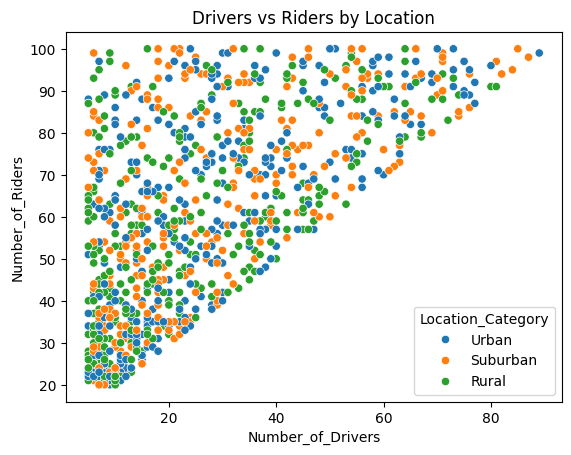

In [ ]:
sns.scatterplot(x='Number_of_Drivers', y='Number_of_Riders', hue='Location_Category', data=df)
plt.title('Drivers vs Riders by Location')
plt.show()

In [ ]:

class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95  # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(tf.keras.Input(shape=(self.state_size,)))  # Use Input layer
        model.add(Dense(24, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))  # Use learning_rate
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])  # returns action

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target += self.gamma * np.max(self.model.predict(next_state)[0])
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)

def load_data(file_path):
    data = pd.read_csv(file_path)
    return data



def simulate_environment(state, action):
    # Placeholder function to simulate the environment and return next_state and reward.
    next_state = state  # Replace with actual logic for next state.
    reward = random.uniform(-1, 1)  # Replace with actual reward logic.
    done = False  # Set to True if episode ends.

    return next_state, reward, done



def preprocess_data(data):
    # Define categorical and numerical features
    categorical_features = ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']
    numerical_features = ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 'Average_Ratings',
                         'Expected_Ride_Duration', 'Historical_Cost_of_Ride']

    # Create preprocessing pipelines for both numerical and categorical data
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)])

    # Apply transformations to the data
    processed_data = preprocessor.fit_transform(data)

    return pd.DataFrame(processed_data), preprocessor  # Return as DataFrame

def main(dataset_path):
    data = load_data(dataset_path)
    processed_data, preprocessor = preprocess_data(data)  # Get both processed data and preprocessor

    state_size = processed_data.shape[1]   # Number of features after processing
    action_size = 10  # Define the number of pricing actions

    agent = DQNAgent(state_size, action_size)
    batch_size = 32

    # Initialize a list to store total rewards for each episode
    total_rewards = []

    # Training loop
    for e in range(100):  # Number of episodes
        state = processed_data.sample(n=1).values.reshape(1, state_size)  # Random initial state
        total_reward = 0  # Initialize total reward for this episode

        for time in range(500):  # Time steps per episode
            action = agent.act(state)
            next_state, reward, done = simulate_environment(state, action)

            agent.remember(state, action, reward, next_state, done)
            state = next_state

            total_reward += reward  # Accumulate reward

            if done:
                print(f"Episode: {e}/{100}, score: {time}, total_reward: {total_reward}, e: {agent.epsilon:.2}")
                break

        total_rewards.append(total_reward)  # Store total reward for this episode

        if len(agent.memory) > batch_size:
            agent.replay(batch_size)

    plt.figure(figsize=(12, 6))
    plt.plot(total_rewards, label='Total Rewards per Episode')
    plt.title('Total Rewards Over Episodes')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.legend()
    plt.grid()
    plt.show()

    average_reward = np.mean(total_rewards)

    input_data = {
        'Location_Category': 'Urban',
        'Customer_Loyalty_Status': 'Gold',
        'Time_of_Booking': 'Evening',
        'Vehicle_Type': 'Sedan',
        'Number_of_Riders': 2,
        'Number_of_Drivers': 1,
        'Number_of_Past_Rides': 10,
        'Average_Ratings': 4.5,
        'Expected_Ride_Duration': 15,
        'Historical_Cost_of_Ride': 20
    }

    predicted_price = predict_price(agent, input_data, preprocessor)
    print(f"Predicted Price: {predicted_price}")

    return average_reward

def predict_price(agent, input_data, preprocessor):
    processed_input = preprocessor.transform(pd.DataFrame([input_data]))

    processed_input = processed_input.reshape(1, -1)

    predicted_price = agent.model.predict(processed_input)

    return predicted_price[0]


In [ ]:
def print_average_reward(avg_reward):
    print(f"Average Reward over episodes: {avg_reward:.2f}")

Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

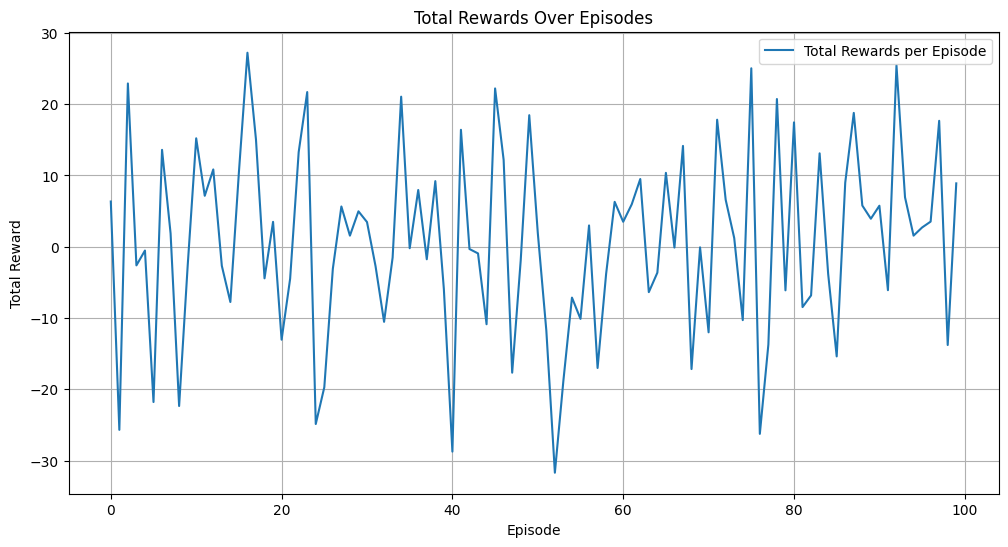

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Price: [8.46808  8.368156 8.229588 8.525145 8.69337  8.221359 8.337379 8.617652
 8.565165 8.895173]
Average Reward over episodes: 0.69


In [ ]:
if __name__ == "__main__":
    dataset_path = "/content/drive/MyDrive/7th semester/DRL project/dynamic_pricing.csv"
    avg_reward = main(dataset_path)  # Call main and store the returned average reward
    print_average_reward(avg_reward)  # Call the separate print function